In [2]:
import pandas as pd
import matplotlib as mpl # לצרגים גרפיים
#from matplotlib import pyplot as plt
import seaborn as sns # לייצור גרפים ופלוטים עם שיפורים
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.image as mpimg #if the graph not shown in github, use mping

In [3]:
df = pd.read_csv(r'C:\Users\Kostya\Desktop\Apartments\clean_apartments4Graphs2.csv')

Text(0, 0.5, 'Relative frequency')

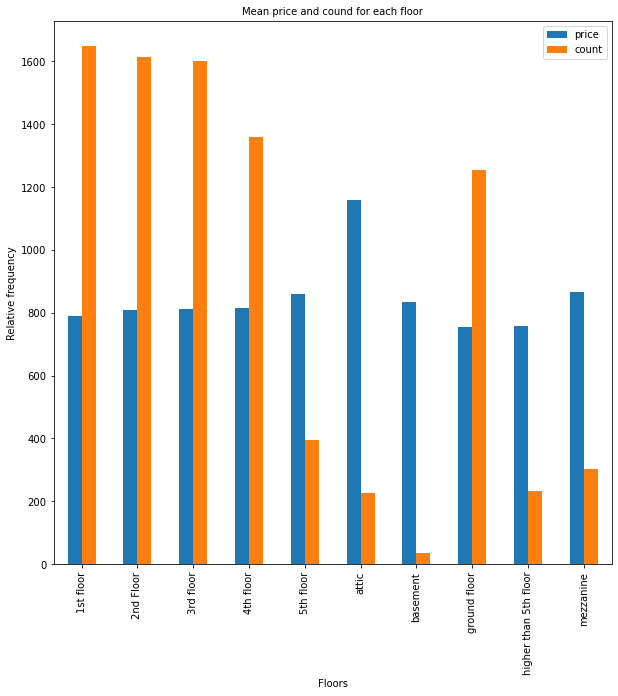

In [4]:
table = df.groupby('floor').agg({'price':'mean','floor':'count'}).rename(columns={'floor':'count'})
table.plot(kind='bar',figsize=(10,10))

plt.title('Mean price and cound for each floor',fontsize = 10)
plt.xlabel('Floors')
plt.ylabel('Relative frequency')

Graph idea taken from https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization

Text(0, 0.5, 'Relative frequency')

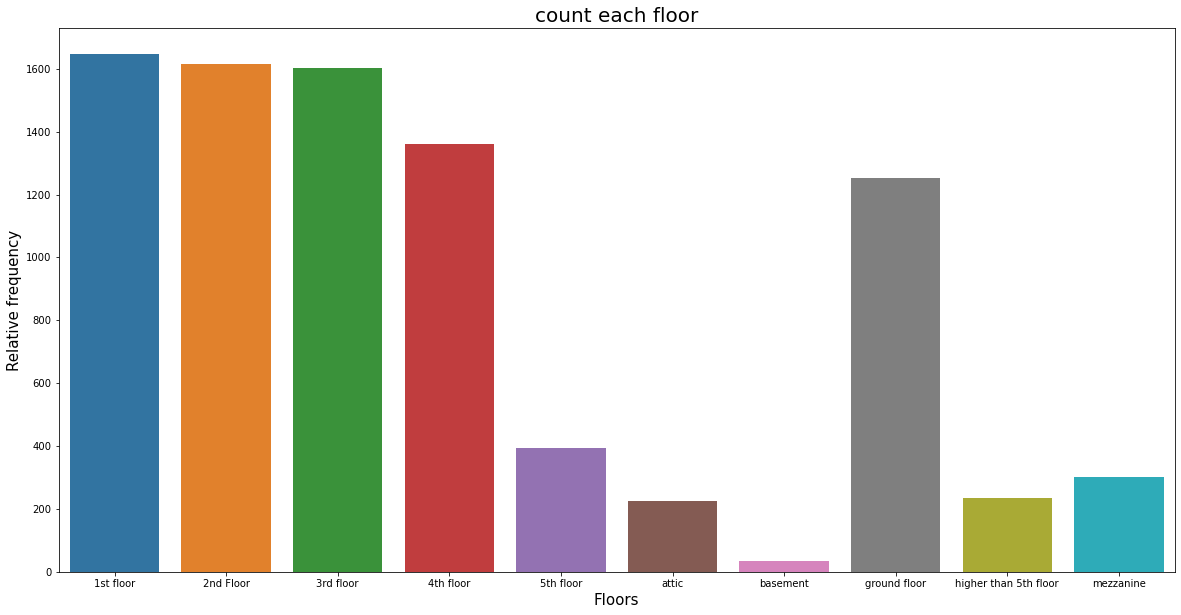

In [5]:

plt.figure(figsize=(20, 10))
sns.countplot(x="floor", data=df, order = df.groupby(by=['floor'])['floor'].count().index)
#plt.ylabel('sum',rotation=0)

plt.title('count each floor',fontsize = 20)
plt.xlabel('Floors',fontsize = 15)
plt.ylabel('Relative frequency',fontsize = 15)

In [6]:
df['range'] = 0
for i in range(len(df)):
    if ((df['price'][i] >= 200) and (df['price'][i]<500)):
        df['range'][i] = '200 to 500'
        
    if ((df['price'][i] >=500) and (df['price'][i]<800)):
        df['range'][i] = '500 to 800'
        
    if ((df['price'][i] >= 800) and (df['price'][i]<1100)):
        df['range'][i] = '800 to 1100'
        
    if ((df['price'][i] >= 1100) and (df['price'][i]<1500)):
        df['range'][i] = '1100 to 1500'   
        
    if ((df['price'][i] >= 1500) and (df['price'][i]<2000)):
        df['range'][i] = '1500 to 2000'
        
    if ((df['price'][i] >= 2000) and (df['price'][i]<=3300)):
        df['range'][i] = '2000 to 3300'

<ipython-input-6-b5bb1ef08ad8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'][i] = '800 to 1100'
D:\Programs\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-6-b5bb1ef08ad8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'][i] = '500 to 800'
<ipython-input-6-b5bb1ef08ad8>:16: SettingWithCopyWarning: 

Text(0, 0.5, 'count')

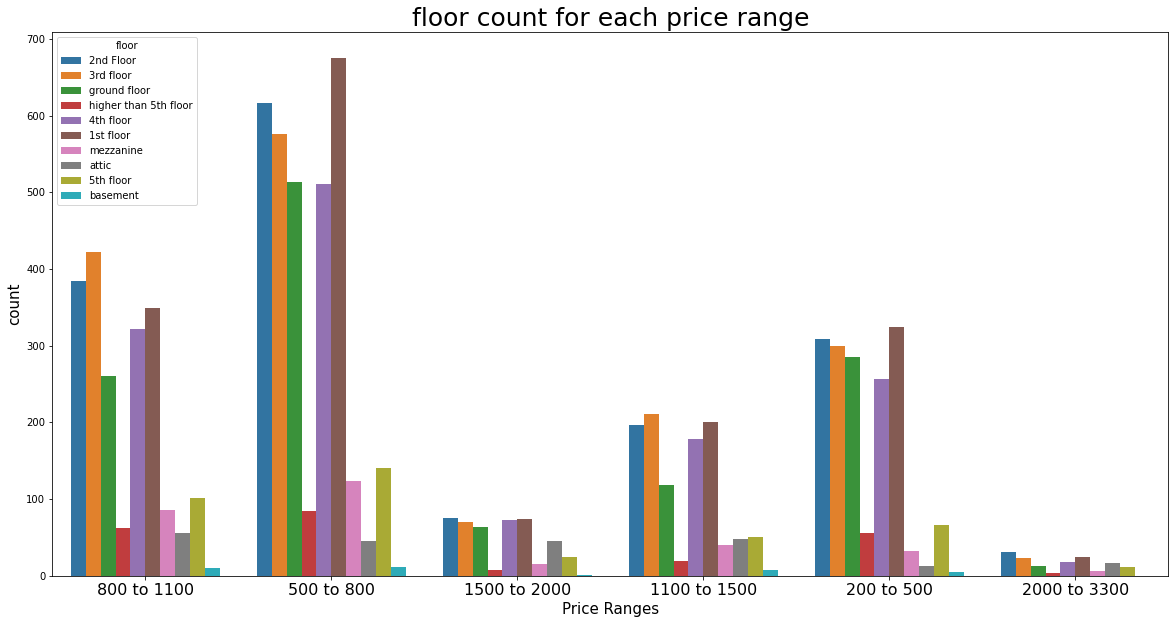

In [7]:
plt.figure(figsize=(20, 10))
sns.countplot(x="range", data=df, hue='floor')
plt.xticks(size=16, rotation=0)

plt.title('floor count for each price range',fontsize = 25)
plt.xlabel('Price Ranges',fontsize = 15)
plt.ylabel('count',fontsize = 15)

Text(0, 0.5, 'count')

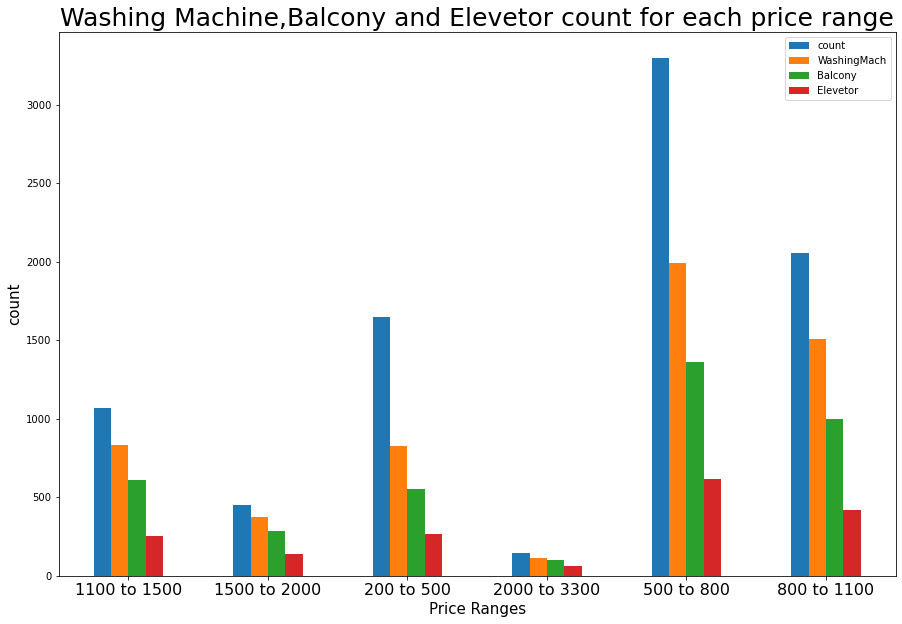

In [8]:
table = df.groupby('range').agg({'price':'count','WashingMach':'sum','Balcony':'sum','Elevetor':'sum',}).rename(columns={'price':'count'})
table.plot(kind='bar',figsize=(15,10))

plt.xticks(size=16, rotation=0)
plt.title('Washing Machine,Balcony and Elevetor count for each price range',fontsize = 25)
plt.xlabel('Price Ranges',fontsize = 15)
plt.ylabel('count',fontsize = 15)

Text(0.5, 1.0, 'Number of apartments by Washing Machine, Balcony, Elevetor by this order')

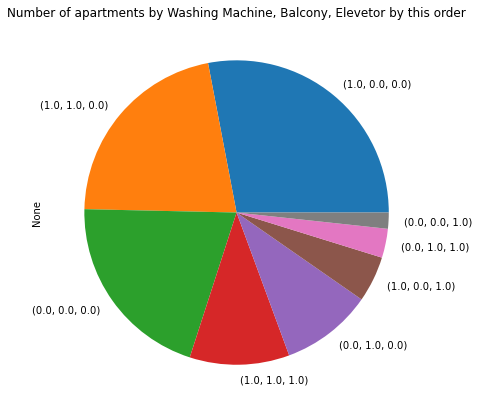

In [9]:
fig2 = plt.figure(figsize=(7,7))
df[['WashingMach','Balcony','Elevetor']].value_counts().plot(kind='pie')
plt.title('Number of apartments by Washing Machine, Balcony, Elevetor by this order')

<Figure size 432x288 with 0 Axes>

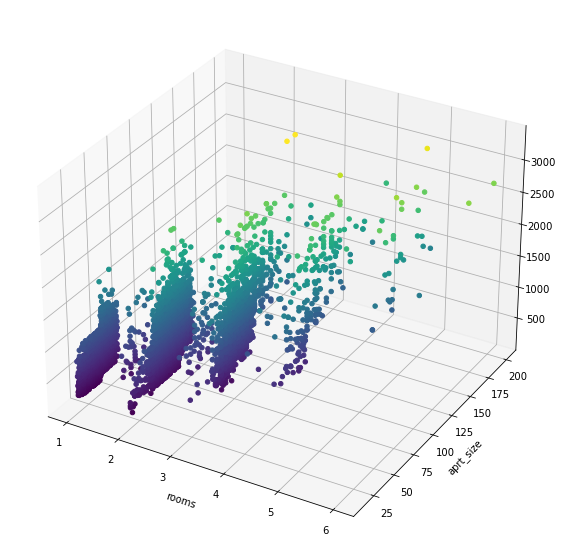

In [10]:
#%matplotlib notebook

fig = plt.figure()
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

#Data for three-dimensional scattered points
xdata = df['rooms'] ##
ydata = df['aprt_size'] #
zdata = df.price

plt.xlabel('rooms') ##
plt.ylabel('aprt_size') #
ax.scatter3D(xdata, ydata, zdata, c=zdata, depthshade=False)




graph idea taken from : https://www.youtube.com/watch?v=fRTHshCj-L0&ab_channel=MichaelFore

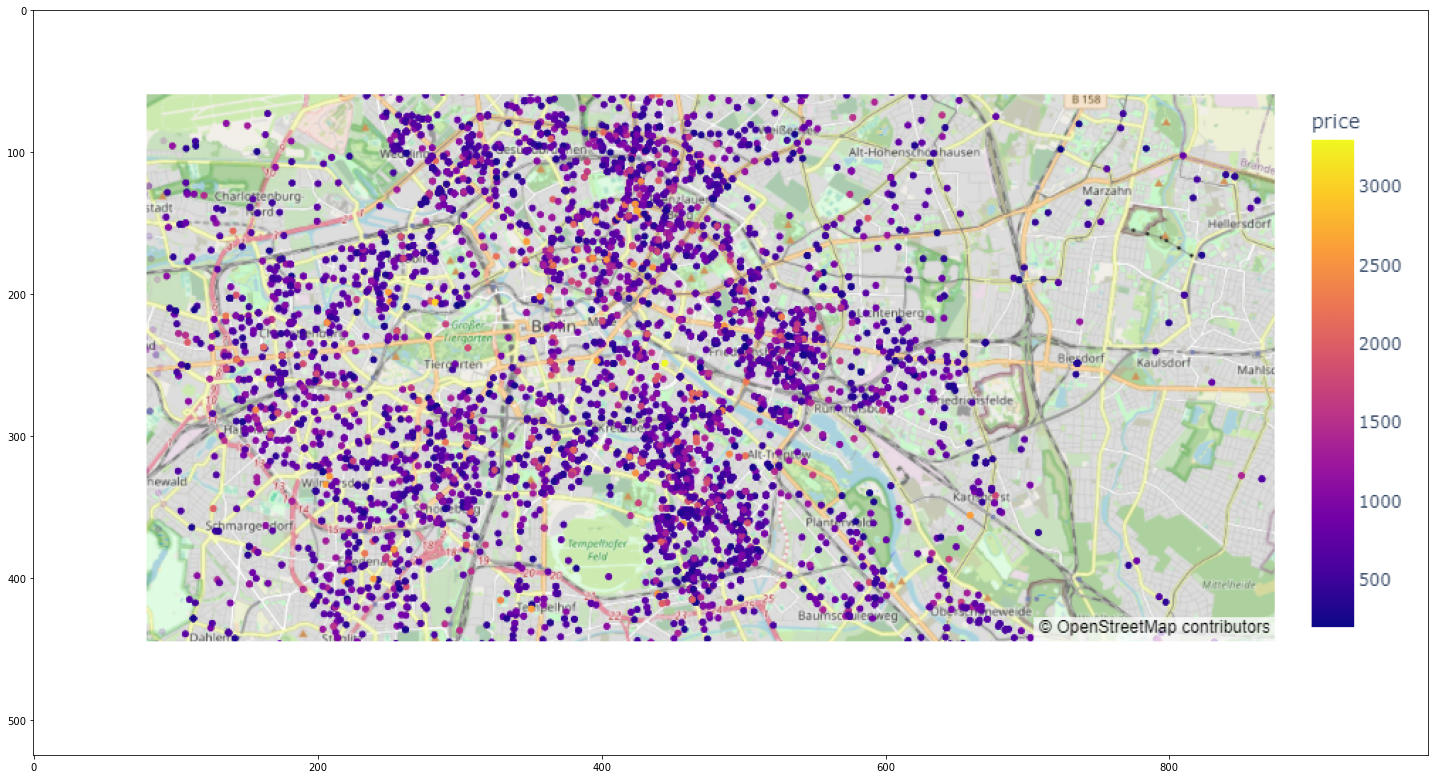

In [11]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',color="price")
fig.update_layout(mapbox_style='open-street-map')
plt.figure(figsize=(25, 15))
img = mpimg.imread(r'C:\Users\Kostya\Downloads\newplot (1).png')
imgplot = plt.imshow(img)
plt.show()

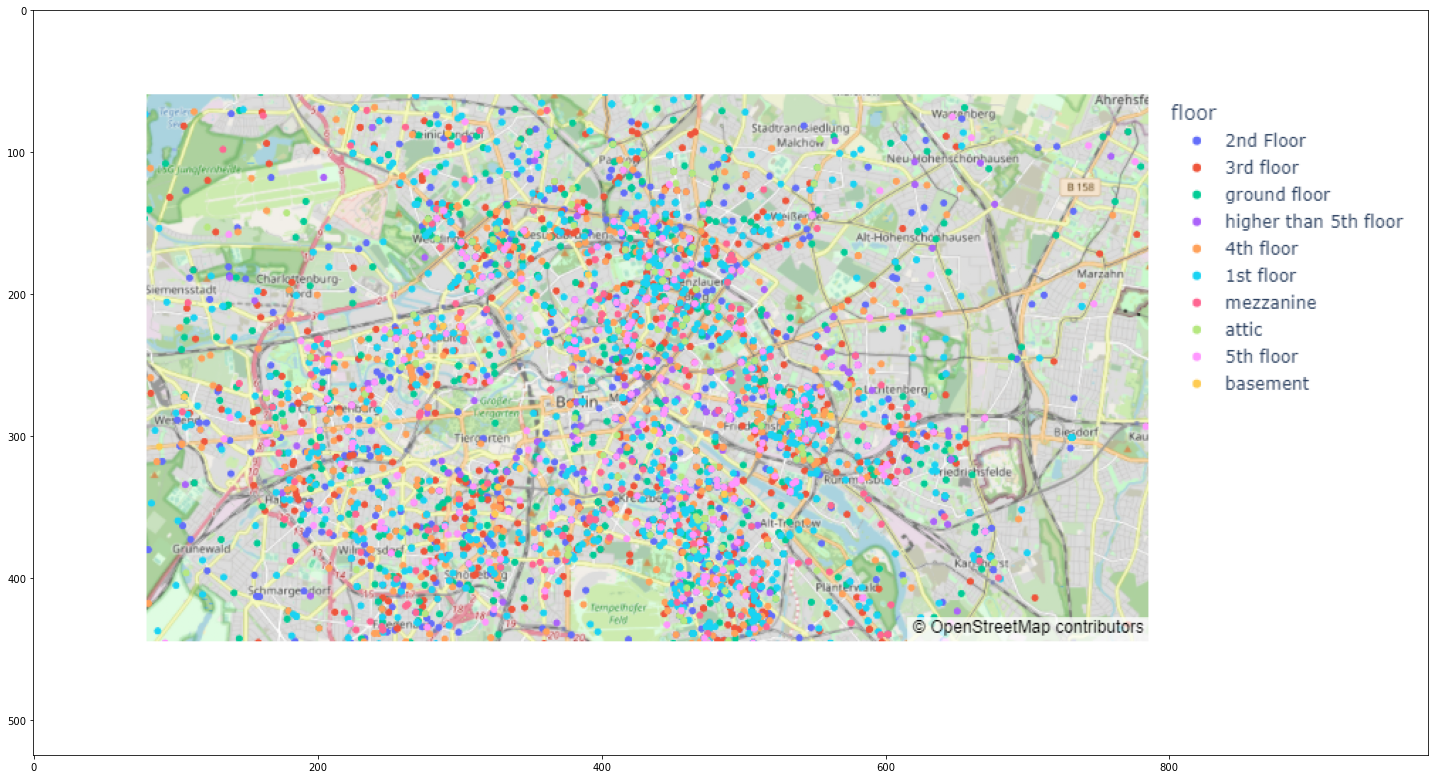

In [12]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',color="floor")
fig.update_layout(mapbox_style='open-street-map')
plt.figure(figsize=(25, 15))
img = mpimg.imread(r'C:\Users\Kostya\Downloads\newplot (2).png')
imgplot = plt.imshow(img)
plt.show()